In [2]:
import pandas as pd
import re

df = pd.read_csv("/home/miroslav/Source/PAWS/paws_mdp_wo.txt", sep=" ", index_col = None)
# df

df['node_from_d'] = df['node_to_d'] - df['node_from_d']
df = df.drop('node_to_d', axis=1)
df = df.rename(columns={'node_from_d': 'distance'})
l = df.columns.tolist()
l[1],l[2] = l[2], l[1]
df = df[l]
df

# dfo = pd.DataFrame(columns=['node_from, node_to, distance, animal_density, cell_x, cell_y'], data=[df['node_from'], df['node_to'], df['node_from_d']-df['node_to_d',])



,node_from,node_to,distance,animal_density,grid_cell_x,grid_cell_y
0,468,455,700.0,3545.563911,24,22
1,468,474,1550.0,8310.410684,24,22
2,468,469,1250.0,6695.978503,24,22
3,468,411,1550.0,8309.798534,24,22
4,468,401,1600.0,8575.276996,24,22
5,468,473,1450.0,8610.271881,24,22
6,468,456,750.0,3921.291004,24,22
7,468,457,800.0,3852.207537,24,22
8,468,458,1150.0,4817.681635,24,22
9,532,527,1200.0,1900.326573,25,23


In [29]:
df[['node_from', 'node_to']].values.tolist()

[[468, 455],
 [468, 474],
 [468, 469],
 [468, 411],
 [468, 401],
 [468, 473],
 [468, 456],
 [468, 457],
 [468, 458],
 [532, 527],
 [532, 529],
 [532, 528],
 [532, 526],
 [195, 131],
 [195, 142],
 [195, 185],
 [195, 132],
 [195, 189],
 [195, 138],
 [195, 262],
 [195, 137],
 [195, 128],
 [195, 188],
 [195, 135],
 [195, 139],
 [195, 130],
 [195, 126],
 [195, 129],
 [195, 196],
 [195, 209],
 [195, 190],
 [195, 187],
 [195, 184],
 [195, 194],
 [195, 127],
 [195, 186],
 [195, 199],
 [195, 197],
 [488, 501],
 [488, 435],
 [488, 493],
 [488, 430],
 [488, 491],
 [488, 436],
 [20, 74],
 [405, 401],
 [405, 412],
 [405, 375],
 [405, 390],
 [405, 379],
 [405, 396],
 [405, 411],
 [405, 389],
 [405, 380],
 [405, 384],
 [405, 404],
 [405, 457],
 [405, 392],
 [405, 399],
 [405, 397],
 [405, 407],
 [405, 400],
 [405, 413],
 [405, 438],
 [405, 398],
 [405, 410],
 [405, 377],
 [405, 378],
 [405, 394],
 [405, 443],
 [405, 437],
 [405, 395],
 [405, 388],
 [115, 114],
 [115, 127],
 [115, 104],
 [115, 116],
 

In [38]:
with open(r'/home/miroslav/Source/PAWS/paws_mdp.txt', 'r') as infile:
    with open(r'/home/miroslav/Source/PAWS/paws_mdp_wo.txt', 'w') as outfile:
        data = infile.read()
        data = re.sub(r'[(),]', "", data)
        outfile.write(data)

In [20]:
df.to_csv("/home/miroslav/Source/PAWS//paws_mdp_out.txt", index = False, sep=" ")

In [16]:
adj = [[0] * 553] * 553

for index, row in df.iterrows():
    # print(int(row['node_from']), int(row['node_to']))
    adj[int(row['node_from'])][int(row['node_to'])] = int(row['distance'])
    adj[int(row['node_to'])][int(row['node_from'])] = int(row['distance'])

In [17]:
import scipy as sp
from scipy import sparse
import numpy as np

dist_matrix = sp.sparse.csgraph.shortest_path(np.array(adj), directed=False)
# dist_matrix

In [19]:
pd.DataFrame(dist_matrix).astype(int).to_csv("/home/miroslav/Source/research_task/dist.gop", index=False, sep=" ")

In [22]:
df.describe()

,node_from,node_to,distance,animal_density,grid_cell_x,grid_cell_y
count,892905.000000,892905.000000,892905.000000,892905.000000,892905.000000,892905.000000
mean,281.502535,281.514203,986.055067,4280.141260,21.128959,21.423755
std,132.288296,132.275022,487.908537,3161.827390,2.037542,1.189485
min,0.000000,0.000000,100.000000,0.000000,16.000000,18.000000
25%,187.000000,187.000000,600.000000,2070.020823,20.000000,21.000000
50%,276.000000,276.000000,1100.000000,3835.881269,21.000000,21.000000
75%,394.000000,394.000000,1350.000000,5995.715499,23.000000,22.000000
max,552.000000,552.000000,2600.000000,31218.189588,26.000000,26.000000


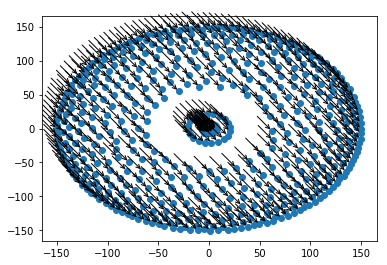

In [8]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold


adist = np.array(dist_matrix)
#amax = np.amax(adist)
#adist /= amax

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(adist)

coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for x, y in zip(coords[:, 0], coords[:, 1]):
    plt.annotate(
        "",
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

In [8]:
coords

array([[ 0.09750944,  0.02187661],
       [ 0.09107352,  0.59030383],
       [ 0.53375917, -0.34107555],
       ..., 
       [-0.00077964,  0.01728243],
       [-0.44870332, -0.21166576],
       [-0.18700101,  0.47691189]])

In [9]:
cdf = pd.DataFrame(coords, columns=['x','y'])
cdf['S'] = np.random.choice(range(1, 100), cdf.shape[0])
cdf

,x,y,S
0,18.415895,-10.346704,6
1,83.382970,-124.351315,44
2,-102.312754,-102.830820,25
3,-13.320572,-143.375254,20
4,89.313765,-31.509628,81
5,-31.900941,104.285725,38
6,-24.578360,-71.068411,32
7,73.993501,20.008176,79
8,75.541076,-52.318754,79
9,-29.078211,145.822722,70


In [10]:
pd.DataFrame(cdf['S']).to_csv("/home/miroslav/Source/research_task/scores.csv", index = False, sep=" ")

In [10]:
pd.DataFrame(cdf).to_csv("/home/miroslav/Source/research_task/points.csv", index = False, sep=" ")

In [15]:
top = cdf.copy()
top['d'] = 0
top['f'] = 1
top['a'] = 1
top['list1'] = 1
top['list2'] = 0
top['O'] = 0
top['C'] = 9000
top = top[['x', 'y', 'd', 'S', 'f', 'a', 'list1', 'list2', 'O', 'C']]
top.to_csv("/home/miroslav/Source/research_task/toptw.csv", index = True, sep=" ")